# **Análisis de Varianza a un factor (Anava o Anova)**

13 de Noviembre 2025

In [123]:
# Sección 1: Importo módulos necesarios para la realización del test
import pandas as pd                                         # Manipulación y análisis de datos
import numpy as np                                          # Cálculos numéricos
import matplotlib.pyplot as plt                             # Gráficos
import seaborn as sns                                       # Visualizaciones estadísticas

from scipy import stats                                     # Pruebas estadísticas
import statsmodels.api as sm                                # Análisis estadístico
from statsmodels.formula.api import ols                     # Ajuste de modelos mediante fórumulas tipo R (por ejemplo, 'y ~ x')
from statsmodels.stats.multicomp import pairwise_tukeyhsd   # Comparaciones múltiples de Tukey

import warnings
warnings.filterwarnings('ignore')

In [124]:
# Sección 2: Carga de base de datos

# Nombre del archivo CSV
pFile = '../data/SEMANA02_BASE01_PRODUCCION.csv'

# Importo la base de datos
DATA = pd.read_csv(pFile, sep=';', decimal=',', header=0, na_values=[""])
DATA.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
produccion,27,28,31,32,33,31,34,35,36,39,40,30,38,42,43,16,20,21,26,27,29,35
Zona,Zona 1,Zona 1,Zona 1,Zona 1,Zona 1,Zona 2,Zona 2,Zona 2,Zona 2,Zona 2,Zona 2,Zona 3,Zona 3,Zona 3,Zona 3,Zona 4,Zona 4,Zona 4,Zona 4,Zona 4,Zona 4,Zona 4


In [125]:
# Sección 3: Base de datos final (sin datos faltantes)

# Columnas a utilizar
pos_vr, pos_factor = 0, 1
idx  = [pos_vr, pos_factor]

# Armo la base de datos
nDATA = DATA.iloc[:, idx].dropna()

# Verifico número de filas
print(f"Filas base de datos original:   {DATA.shape[0]}")
print(f"Filas base de datos modificada: {nDATA.shape[0]}")
nDATA.T

Filas base de datos original:   22
Filas base de datos modificada: 22


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
produccion,27,28,31,32,33,31,34,35,36,39,40,30,38,42,43,16,20,21,26,27,29,35
Zona,Zona 1,Zona 1,Zona 1,Zona 1,Zona 1,Zona 2,Zona 2,Zona 2,Zona 2,Zona 2,Zona 2,Zona 3,Zona 3,Zona 3,Zona 3,Zona 4,Zona 4,Zona 4,Zona 4,Zona 4,Zona 4,Zona 4


In [126]:
# Sección 4: Obtención de las variables para la realización del modelo

VR      = nDATA.iloc[:, 0]
FACTOR  = nDATA.iloc[:, 1]
FACTOR = FACTOR.astype("category")

In [131]:
# Sección 5: Verificaciones PRE análisis

# Verificación del tipo de datos de VR
print(f"VR es numérica:         {np.issubdtype(VR.dtype, np.number)}")

# 3) Verificación de FACTOR
print(f"FACTOR es categórico:   {pd.api.types.is_categorical_dtype(FACTOR)}")
print(f"Niveles del factor:     {FACTOR.cat.categories}")
print(f"Conteo por nivel:\n     {FACTOR.value_counts()}")

VR es numérica:         True
FACTOR es categórico:   True
Niveles del factor:     Index(['Zona 1', 'Zona 2', 'Zona 3', 'Zona 4'], dtype='object')
Conteo por nivel:
     Zona
Zona 4    7
Zona 2    6
Zona 1    5
Zona 3    4
Name: count, dtype: int64


In [132]:
# Sección 6: ANOVA a 1 Factor

modelo      = ols("VR ~ C(FACTOR)", data=nDATA.rename(columns={nDATA.columns[0]: "VR", nDATA.columns[1]: "FACTOR"})).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

In [133]:
# Sección 7: Verificación POST análisis

# Obtención de residuos
residuos = modelo.resid

# Verificación de normalidad (Test Shapiro-Wilk)
SHAPIRO = stats.shapiro(residuos)
print(f"Shapiro-Wilk Test (residuos): \t Estadístico = {SHAPIRO.statistic:.4f}\tp-valor = {SHAPIRO.pvalue:.4f}")

# Verificación de homogeneidad de varianzas (Test Bartlett)
BARTLETT = stats.bartlett(*[VR[FACTOR == nivel] for nivel in FACTOR.cat.categories])
print(f"Test de Bartlett (FACTOR): \t Estadístico = {BARTLETT.statistic:.4f}\tp-valor = {BARTLETT.pvalue:.4f}")

Shapiro-Wilk Test (residuos): 	 Estadístico = 0.9756	p-valor = 0.8363
Test de Bartlett (FACTOR): 	 Estadístico = 6.3247	p-valor = 0.0968


In [134]:
# Sección 7: Interpretación estadística

# Nivel de significancia
alpha = 0.05

# Tabla ANOVA a 1 factor
print("\nTabla ANOVA:\n", anova_table)

# Interpretación
p_value = anova_table["PR(>F)"][0]
print(f"p-valor = {p_value:.4f}")

if p_value < alpha:
    print("➡️ Se rechaza H0: existen diferencias significativas entre grupos.")
else:
    print("➡️ No se rechaza H0: no existen diferencias significativas.")


Tabla ANOVA:
                sum_sq    df         F    PR(>F)
C(FACTOR)  612.259524   3.0  8.558273  0.000958
Residual   429.240476  18.0       NaN       NaN
p-valor = 0.0010
➡️ Se rechaza H0: existen diferencias significativas entre grupos.


In [135]:
# Sección 7: Test de Tukey

if p_value < alpha:
    tukey = pairwise_tukeyhsd(endog=VR, groups=FACTOR, alpha=0.05)
    print("\nResultados del test de Tukey:\n", tukey)
else:
    print("\nANOVA no significativo: no se realiza test de Tukey.")


Resultados del test de Tukey:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
Zona 1 Zona 2   5.6333 0.2608   -2.724 13.9906  False
Zona 1 Zona 3     8.05 0.1016  -1.2084 17.3084  False
Zona 1 Zona 4  -5.3429 0.2758 -13.4243  2.7386  False
Zona 2 Zona 3   2.4167 0.8683  -6.4923 11.3256  False
Zona 2 Zona 4 -10.9762 0.0039 -18.6547 -3.2977   True
Zona 3 Zona 4 -13.3929 0.0019 -22.0435 -4.7422   True
-----------------------------------------------------


In [136]:
# Sección 8: Generación de Tablas (extras p1)

n_total = len(nDATA)
k = len(FACTOR.cat.categories)

print(f"Cantidad de datos totales:\t{n_total}")
print(f"Cantidad de niveles:\t\t{k}")

gl_total  = n_total - 1
gl_factor = k - 1
gl_error  = n_total - k

print(f"\nGrados de libertad total:\t{gl_total}")
print(f"Grados de libertad factor:\t{gl_factor}")
print(f"Grados de libertad residuos:\t{gl_error}")

Cantidad de datos totales:	22
Cantidad de niveles:		4

Grados de libertad total:	21
Grados de libertad factor:	3
Grados de libertad residuos:	18


In [137]:
# Sección 8: Generación de Tablas (extras p2)

print("\nMedidas de posición de VR")
display(VR.describe().to_frame().T.round(4))

print("\nMedidas de dispersión de VR")
print(f"Desvío estándar:\t{VR.std():.4f}")
print(f"Varianza:       \t{VR.var():.4f}")
print(f"Error estándar:\t{VR.std() / np.sqrt(n_total):.4f}")


Medidas de posición de VR


,count,mean,std,min,25%,50%,75%,max
produccion,22.0,31.5,7.0424,16.0,27.25,31.5,35.75,43.0



Medidas de dispersión de VR
Desvío estándar:	7.0424
Varianza:       	49.5952
Error estándar:	1.5014


In [139]:
# Sección 8: Generación de Tablas (extras p3)

print("\nMedias por nivel")
display(VR.groupby(FACTOR).mean().to_frame().T.round(4))

print("\nDesvios por nivel")
display(VR.groupby(FACTOR).std().to_frame().T.round(4))

print("\nError estándar por nivel")
display(VR.groupby(FACTOR).std() / np.sqrt(VR.groupby(FACTOR).count()).to_frame().T.round(4))


Medias por nivel


Zona,Zona 1,Zona 2,Zona 3,Zona 4
produccion,30.2,35.8333,38.25,24.8571



Desvios por nivel


Zona,Zona 1,Zona 2,Zona 3,Zona 4
produccion,2.5884,3.3116,5.909,6.3621



Error estándar por nivel


Zona,Zona 1,Zona 2,Zona 3,Zona 4
produccion,1.157567,1.351948,2.954516,2.4046


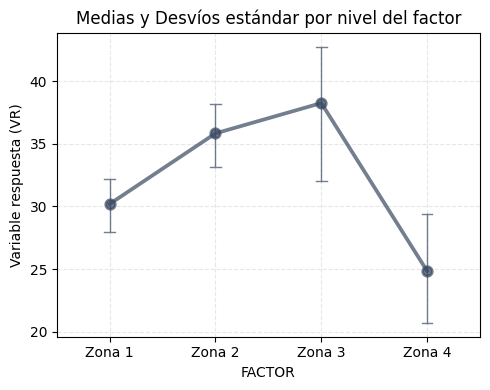

In [140]:
# Sección 9: Gráfico por nivel de factor

plt.figure(figsize=(5, 4))
sns.pointplot(x=FACTOR, y=VR, capsize=.1, errwidth=1, color="#384860", alpha=0.7)
plt.title("Medias y Desvíos estándar por nivel del factor", fontsize=12)
plt.xlabel("FACTOR", fontsize=10)
plt.ylabel("Variable respuesta (VR)", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()